In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/yeomsangyoon/Visual Studio/0_tensor/source/PAMAP_features.csv", index_col=0)
df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [3]:
df.columns

Index(['sub_id', 'activity_id', 'act_level', 'hr_mean', 'hr_mean_normal',
       'hr_std', 'hr_std_normal', 'hand_tmp_mean', 'hand_tmp_std',
       'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean',
       'hand_acc_y_std', 'hand_acc_z_mean', 'hand_acc_z_std',
       'hand_gyr_x_mean', 'hand_gyr_x_std', 'hand_gyr_y_mean',
       'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std', 'chest_tmp_mean',
       'chest_tmp_std', 'chest_acc_x_mean', 'chest_acc_x_std',
       'chest_acc_y_mean', 'chest_acc_y_std', 'chest_acc_z_mean',
       'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
       'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean',
       'chest_gyr_z_std', 'ankle_tmp_mean', 'ankle_tmp_std',
       'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean',
       'ankle_acc_y_std', 'ankle_acc_z_mean', 'ankle_acc_z_std',
       'ankle_gyr_x_mean', 'ankle_gyr_x_std', 'ankle_gyr_y_mean',
       'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std',
       '

sub_id
5    1651
2    1618
8    1576
6    1556
1    1518
7    1430
4    1353
3    1042
9      29
Name: count, dtype: int64 

Subject Count: 9


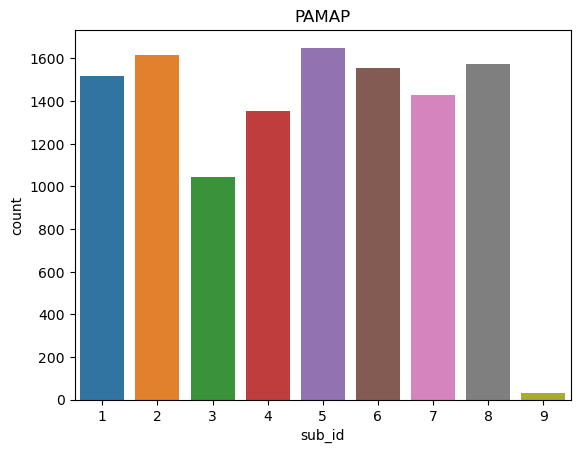

In [4]:
# sub_id 레이블 개수 확인 (숫자)
print(df['sub_id'].value_counts(),"\n")

# sub_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="sub_id")
plt.xlabel("sub_id")
plt.title("PAMAP")

# sub_id subject 개수 확인
subject_count = df['sub_id'].nunique()
print("Subject Count:", subject_count)

activity_id
17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: count, dtype: int64 

Subject Count: 12


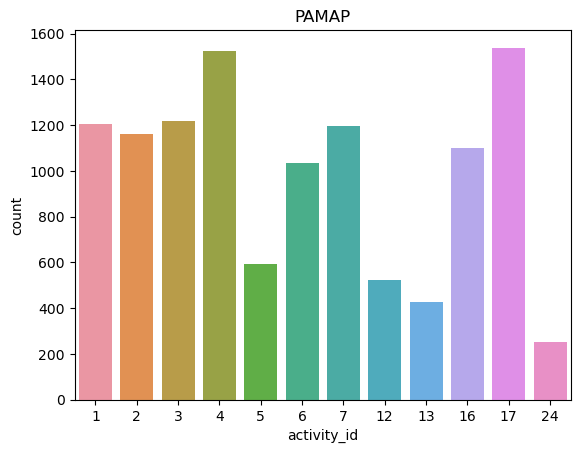

In [5]:
# activity_id 레이블 개수 확인 (숫자)
print(df['activity_id'].value_counts(),"\n")

# activity_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="activity_id")
plt.xlabel("activity_id")
plt.title("PAMAP")

# activity_id subject 개수 확인
subject_count = df['activity_id'].nunique()
print("Subject Count:", subject_count)

act_level
moderate    5283
light       5124
vigorous    1366
Name: count, dtype: int64 

Subject Count: 3


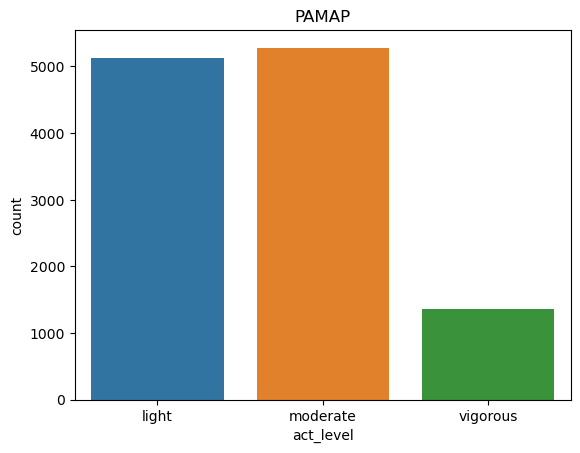

In [6]:
# act_level 레이블 개수 확인 (숫자)
print(df['act_level'].value_counts(),"\n")

# activity_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="act_level")
plt.xlabel("act_level")
plt.title("PAMAP")

# activity_id subject 개수 확인
subject_count = df['act_level'].nunique()
print("Subject Count:", subject_count)

In [7]:
# 라벨 인코딩 (숫자가 일련의 순서대로 배치되어 있지 않은 activity_id와, 문자형 데이터로 라벨링이 되어 있는 act_level 라벨이 라벨링 필요.)

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['sub_id'] = label.fit_transform(df['sub_id'])
df['activity_id'] = label.fit_transform(df['activity_id'])
df['act_level'] = label.fit_transform(df['act_level'])

df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,1,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,2,1,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,5,3,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,6,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


Text(0.5, 1.0, 'PAMAP')

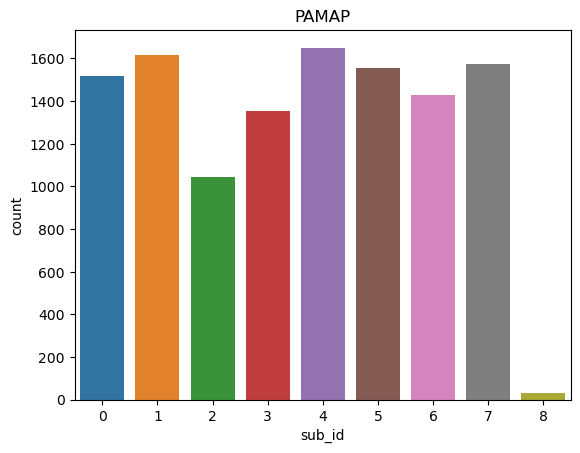

In [9]:
# 라벨링 결과 확인
# sub_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="sub_id")
plt.xlabel("sub_id")
plt.title("PAMAP")

Text(0.5, 1.0, 'PAMAP')

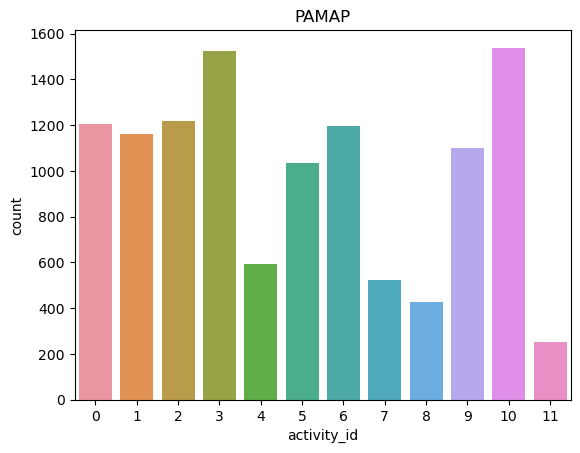

In [10]:
# 라벨링 결과 확인
# activity_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="activity_id")
plt.xlabel("activity_id")
plt.title("PAMAP")

Text(0.5, 1.0, 'PAMAP')

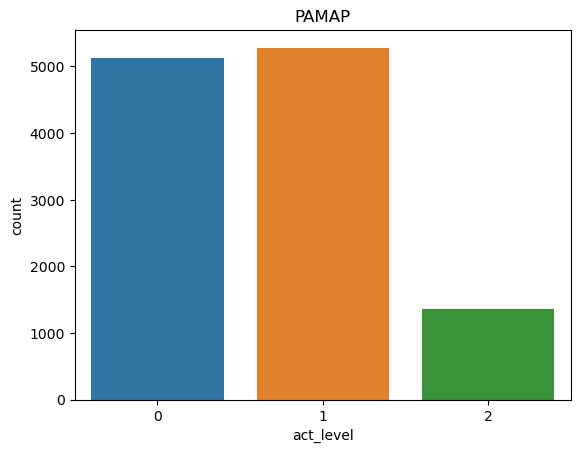

In [11]:
# 라벨링 결과 확인
# act_level 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="act_level")
plt.xlabel("act_level")
plt.title("PAMAP")

In [12]:
# 결측치 확인
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [13]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [14]:
# 데이터 표준화

In [15]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체 생성
scaler = StandardScaler()

# 특성 데이터를 표준화
std_scaled_data = scaler.fit_transform(df)

print(std_scaled_data)

[[-1.10007328  1.47863978 -1.01558098 ... -0.61562601  0.08381122
  -2.15529121]
 [-1.10007328 -0.56216047  0.47617634 ... -1.6565917  -1.2380582
   1.16806561]
 [ 1.04302355 -0.27061758  1.96793366 ... -1.6780149  -0.98155087
   1.20285091]
 ...
 [ 0.61440418 -0.56216047  0.47617634 ... -1.36494541 -0.808522
   0.10948624]
 [-1.10007328  0.31246821  0.47617634 ... -1.95472083 -1.18248997
   1.31411775]
 [-1.10007328  0.89555399  0.47617634 ...  0.25255394 -1.25462739
  -0.37168277]]


In [16]:
X=df.drop(['sub_id', 'activity_id'], axis=1)

print(X.head(),"\n\n")

y=df['activity_id']

print(y.value_counts())

       act_level     hr_mean  hr_mean_normal    hr_std  hr_std_normal  \
3006           0   87.000000        1.175676  0.000000   7.105427e-15   
3497           1  124.605469        1.683858  0.927920   1.253946e-02   
14495          2  113.493430        1.891557  2.315888   3.859813e-02   
13278          0   82.513672        1.375228  0.492657   8.210948e-03   
14969          0   73.000000        1.106061  0.000000   7.327472e-15   

       hand_tmp_mean  hand_tmp_std  hand_acc_x_mean  hand_acc_x_std  \
3006         34.3750           0.0        -1.165524        2.383779   
3497         31.8750           0.0       -12.040995        3.734766   
14495        32.5000           0.0        -3.723040       10.188184   
13278        33.8125           0.0        -3.618932        1.935690   
14969        34.4375           0.0        -9.275877        0.082824   

       hand_acc_y_mean  ...  ankle_acc_xz_cor  hand_gyr_xy_cor  \
3006          3.381285  ...          0.233251        -0.472662   
34

In [17]:
# One-Hot Encoding

In [18]:
y = pd.get_dummies(y).values
y

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
# X,y 분류

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3733,1,126.350675,1.707442,0.481022,6.500298e-03,31.06958,0.019809,-11.155840,2.169085,3.275928,...,0.034322,-0.602520,0.043783,-0.640547,-0.117516,-0.650532,-0.089236,-0.619168,-0.709268,0.270112
14076,1,116.000000,1.933333,0.000000,2.420286e-14,33.06958,0.019809,-1.168302,3.338601,9.672736,...,-0.116193,0.041214,-0.049492,-0.285888,0.033368,0.470741,-0.176193,-0.757515,-0.626930,0.429096
15690,2,122.943892,1.862786,1.517114,2.298658e-02,34.31250,0.000000,-10.513332,5.402042,-1.033538,...,-0.332085,-0.050074,0.810940,-0.217737,0.125797,-0.375305,-0.104628,0.013147,0.738929,0.029031
12870,0,75.785156,1.263086,0.406368,6.772796e-03,32.72290,0.030973,-9.079240,0.161293,2.633184,...,0.270700,-0.254684,-0.146603,-0.082435,0.178775,-0.258471,-0.128551,0.127899,-0.047703,-0.060931
13034,0,75.654297,1.260905,0.471849,7.864148e-03,33.25000,0.000000,-9.204090,0.131730,2.883122,...,0.229206,-0.305763,-0.159656,-0.338020,0.094215,-0.144609,-0.311287,-0.094936,0.049618,-0.319101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0,92.000000,1.243243,0.000000,6.661338e-15,33.81250,0.000000,-4.357689,2.952657,7.693815,...,0.137440,-0.174543,0.237796,0.067775,-0.201561,-0.616165,0.007301,0.567074,-0.546483,-0.398801
14291,1,104.605469,1.743424,0.683011,1.138352e-02,33.00000,0.000000,-4.657513,1.604491,2.285957,...,-0.033366,-0.382679,0.008502,-0.425129,0.274348,-0.454366,-0.110536,0.345683,-0.514809,0.063547
4650,0,80.742188,1.187385,0.433352,6.372826e-03,31.62500,0.000000,-0.606078,0.534985,8.980145,...,0.522188,-0.176937,-0.446573,0.108573,0.067445,-0.624934,-0.092516,0.083229,-0.461855,-0.179261
2156,0,86.597656,1.170239,1.109448,1.499254e-02,33.49292,0.019809,-1.760465,7.712154,3.789683,...,0.240315,-0.214268,-0.464665,0.345377,0.205332,-0.414919,-0.600709,0.260374,-0.102413,0.068893


In [21]:
print(X_test.shape)
print(X_train.shape)

(2944, 65)
(8829, 65)


In [22]:
y_train

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [23]:
print(y_test.shape)
print(y_train.shape)

(2944, 12)
(8829, 12)


In [24]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Nadam

model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='relu'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(20,activation='relu'))
model.add(Dense(12,activation='softmax'))

#출력 유닛 수는 레이블 수에 맞게끔 변수를 맞춰 설정해줘야 함. 여기서는 12

model.compile(Adam(learning_rate=0.02),'categorical_crossentropy', metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │         1,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,852 (11.14 KB)

 Trainable params: 2,852 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - accuracy: 0.4857 - loss: 1.8414 - val_accuracy: 0.9450 - val_loss: 0.1801
Epoch 2/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9362 - loss: 0.1949 - val_accuracy: 0.8522 - val_loss: 0.4418
Epoch 3/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9089 - loss: 0.2619 - val_accuracy: 0.9637 - val_loss: 0.1134
Epoch 4/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9542 - loss: 0.1411 - val_accuracy: 0.9480 - val_loss: 0.2041
Epoch 5/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9560 - loss: 0.1282 - val_accuracy: 0.8944 - val_loss: 0.3340
Epoch 6/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9475 - loss: 0.1688 - val_accuracy: 0.9331 - val_loss: 0.2742
Epoch 7/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9285 - loss: 0.2502 - val_accuracy: 0.9626 - val_loss: 0.1283
Epoch 8/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9517 - loss: 0.1499 - 

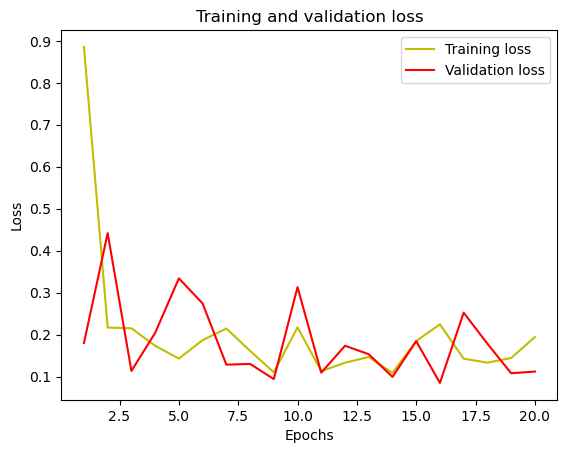

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

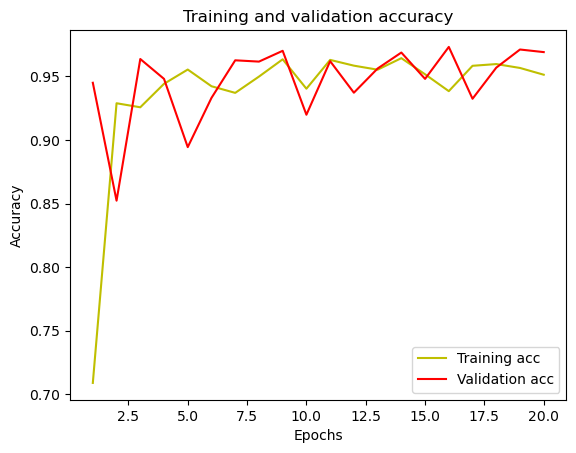

In [27]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# 모델의 정확도 출력

In [29]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class),"\n")
print(confusion_matrix(y_test_class,y_pred_class),"\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.90      0.91      0.91       302
           2       0.94      0.86      0.90       295
           3       0.99      1.00      0.99       367
           4       1.00      0.98      0.99       146
           5       1.00      0.99      1.00       274
           6       0.99      1.00      1.00       302
           7       1.00      0.99      0.99       144
           8       1.00      0.99      1.00       111
           9       0.94      1.00      0.97       288
          10       0.94      0.96      0.95       349
          11       0.97      1.00      0.98        62

    accuracy                           0.97      2944
   macro avg       0.97      0.97      0.97      2944
weighted avg       0.97      0.97      0.97      2944
 

[[304   0   0   0   0   0   0   0   0   0   0   0]
 [  0 275  13   0   0   0   0   0   0   4  10   0]
 [  0  26 254   0   0   0   0